In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display


# Question 1

In [2]:
rand = np.loadtxt('rand_points.txt', delimiter = ' ')
x = rand[:,0]
y = rand[:,1]
z = rand[:,2]

Random integers from John's random points file. There are very clear planes in the data

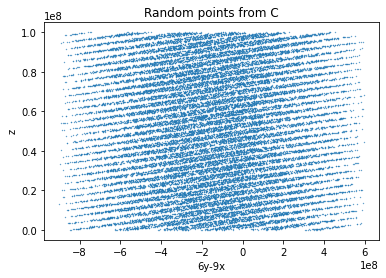

In [3]:
plt.scatter(6*y-9*x,z,s=0.1)
plt.xlabel('6y-9x')
plt.ylabel('z')
plt.title('Random points from C')
plt.savefig('P1a.png')
# Found this source explaining why they will lie on 15 planes, allowing for those constants on x and y to show the
# structure https://www.yumpu.com/en/document/read/4100947/physics-115-242-randu-a-bad-random-number-generator

In [4]:
rand = np.loadtxt('rand_points_python.txt', delimiter = ' ')
x = rand[:,0]
y = rand[:,1]
z = rand[:,2]

Here it is for the python random number generator (using random.randint function) test_python_rand.py. I had to generate 10x less numbers because python random generator is so much slower, but I think there is quite obviously no pattern in the data

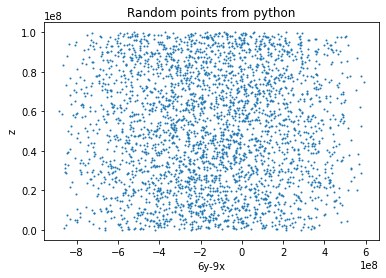

In [5]:
plt.scatter(6*y-9*x,z,s=1)
plt.xlabel('6y-9x')
plt.ylabel('z')
plt.title('Random points from python')
plt.savefig('P1b.png')
# Found this source explaining why they will lie on 15 planes, allowing for those constants on x and y to show the
# structure https://www.yumpu.com/en/document/read/4100947/physics-115-242-randu-a-bad-random-number-generator

In [6]:
rand = np.loadtxt('rand_points_mymachine.txt', delimiter = ' ')
x = rand[:,0]
y = rand[:,1]
z = rand[:,2]

Here's the C random number generator run on my machine, test_broken_libc.py. Produces the same result as the first case.

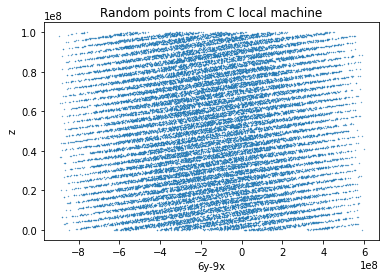

In [7]:
plt.scatter(6*y-9*x,z,s=.1)
plt.xlabel('6y-9x')
plt.ylabel('z')
plt.title('Random points from C local machine')
plt.savefig('P1c.png')
# Found this source explaining why they will lie on 15 planes, allowing for those constants on x and y to show the
# structure https://www.yumpu.com/en/document/read/4100947/physics-115-242-randu-a-bad-random-number-generator

# Question 2

We will have to use a lorentzian distribution. We need a function that can be defined to be > exponential at all points. Power law doesn't work as it will approach infinity at 0. Gaussian doesn't work as it decays too quickly and will eventually drop under the exponential.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp


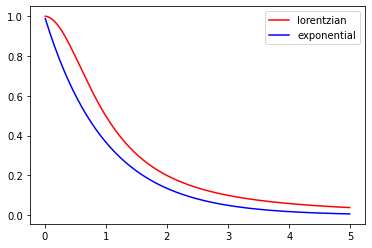

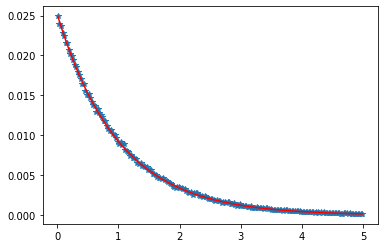

In [8]:
# Most of this was based on reapplying John's script from his Nov 2nd lecture
# Define our lorentzian
def lorentzians(n):
    q=np.pi*(np.random.rand(n)-0.5)
    return np.tan(q)

# Generate some random data in lorentzian shape
n=1000000
t = lorentzians(n)
y=1/(1+t**2)*np.random.rand(n)

# Binned lorentzian data
bins = np.linspace(0,5,201)
aa,bb=np.histogram(t,bins)
aa=aa/aa.sum()

cents=0.5*(bins[1:]+bins[:-1])

# Plotting the exponential and lorentzian to see what we're dealing with
myexp=np.exp(-cents)
mylor=1/(1+cents**2)

# Here's what they look like
plt.figure(1)
plt.plot(cents,mylor,'r',label='lorentzian')
plt.plot(cents,myexp,'b',label='exponential')
plt.legend()
plt.savefig('P2a.png')

# Implement our acceptance criteria
accept = y < np.exp(-t)
t_use = t[accept]

# turn it into a histogram, define expected behaviour
aa,bb = np.histogram(t_use,bins)
aa = aa/aa.sum()
pred = np.exp(-cents)
pred=pred/pred.sum()
# plot it
plt.figure(2)
plt.plot(cents,aa,'*')
plt.plot(cents,pred,'r')
plt.savefig('P2b.png')

The efficiency of the generator will be given by the ratio of integral of the PDF of the exponential over the range of interest to the integral of the PDF of the lorentzian over the range of interest. The highest efficiency will by setting the two equations such that the ratio is as close to one as possible, without the PDF of the lorentzian taking a larger value than the exponential at any given point. 

The way we have set this up in the previous box is the most efficient generator. The exponential and lorentzian are equal at a position of 0. If any attempt is made to transform the lorentzian function to have a smaller integral, it will be smaller than the exponential at some point.

The efficiency will be given by $\int_{0}^{\infty}e^{-x}dx\div\int_{0}^{\infty}\dfrac{1}{1+x^{2}}dx = 1\div\pi/2 = 2/\pi$. Since we defined our function from 0 to 10 in the problem the efficiency won't quite be this value but will be quite close (0.6797)

# Question 3

[ 0.0076009   0.01381551  0.01950687 ...  0.001999    0.00099975
 -0.        ]
max v is  0.7357588428385197


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


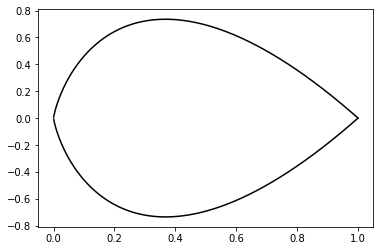

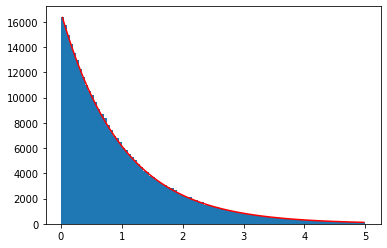

In [10]:
# Define u,v function
u=np.linspace(0,1,2001)
u=u[1:]
#have u<exp(-0.5*r) so
#log(u)=-0.5(v/u)
#v=2u*(-log(u))

# Find max of teardrop function
v=-2*u*np.log(u)
print(v)
print('max v is ',v.max())

# plot boundary
plt.figure(1)
plt.plot(u,v,'k')
plt.plot(u,-v,'k')
plt.savefig('P3a.png')

# Define acceptance criteria
N=1000000
u=np.random.rand(N)
v=(np.random.rand(N)*2-1)*v.max()
r=v/u
accept=u<np.exp(-0.5*r)
gauss=r[accept]

# Define his
a,b=np.histogram(gauss,100,range=(0,5))
bb=0.5*(b[1:]+b[:-1])
pred=np.exp(-bb)/np.sqrt(2*np.pi)*np.sum(accept)*(bb[2]-bb[1])
plt.figure(2)
plt.bar(bb,a,0.05)
plt.plot(bb,pred,'r')
plt.savefig('P3b.png')